# loading relative entropy

In [1]:
import deepdish as dd
root_dir = '/home/hsher/seqdata/metadensity/'
entro = dd.io.load(root_dir + '729_entropy.h5')

In [2]:
entro.keys()

dict_keys([('five_utr', 'left'), ('five_utr', 'right'), ('exon', 'left'), ('exon', 'right'), ('intron', 'left'), ('intron', 'right'), ('three_utr', 'left'), ('three_utr', 'right')])

In [3]:
entro['five_utr', 'left'].shape

(500,)

In [11]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
def plot_entropy(entro, name):
    ''' get a bunch of eCLIPs, plot their mean density'''
    fig2 = plt.figure(figsize = (20, 5))
    spec2 = gridspec.GridSpec(ncols=12, nrows=1, figure=fig2)
 
    # axis
    utr_five_lt = fig2.add_subplot(spec2[0, 0],frameon=False)
    utr_five_rt = fig2.add_subplot(spec2[0, 1], sharey = utr_five_lt,frameon=False)
    exon_lt = fig2.add_subplot(spec2[0, 2:4], sharey = utr_five_lt,frameon=False)
    exon_rt = fig2.add_subplot(spec2[0, 4:6], sharey = utr_five_lt,frameon=False)
    intron_lt = fig2.add_subplot(spec2[0, 6:8], sharey = utr_five_lt,frameon=False)
    intron_rt = fig2.add_subplot(spec2[0, 8:10], sharey = utr_five_lt,frameon=False)
    utr_three_lt = fig2.add_subplot(spec2[0, 10:11], sharey = utr_five_lt,frameon=False)
    utr_three_rt = fig2.add_subplot(spec2[0, 11:12], sharey = utr_five_lt,frameon=False)
    
    axes = [utr_five_lt,utr_five_rt,exon_lt,exon_rt,intron_lt,intron_rt,utr_three_lt,utr_three_rt]
    # trun off yticklabels/ xticklabels
    _ = [plt.setp(ax.get_yticklabels(), visible=False) for ax in axes[1:]]
    # set ylabel
    axes[0].set_ylabel('relative entropy')
    #axes[0].set_yscale('log')
    
    i=0
    for feat in ['five_utr', 'exon', 'intron', 'three_utr']:
        for align in ['left', 'right']:
            axes[i].plot(entro[feat, align], label = name, alpha = 0.5)
            axes[i].set_title('{}'.format(feat))
            if align == 'right':
                axes[i].set_xticks(np.arange(0, len(entro), 200))
                axes[i].set_xticklabels(np.arange(-len(entro), 0, 200))
                    
            i+= 1
    plt.legend()
    plt.suptitle('relative entropy: positive v.s. negative')
    

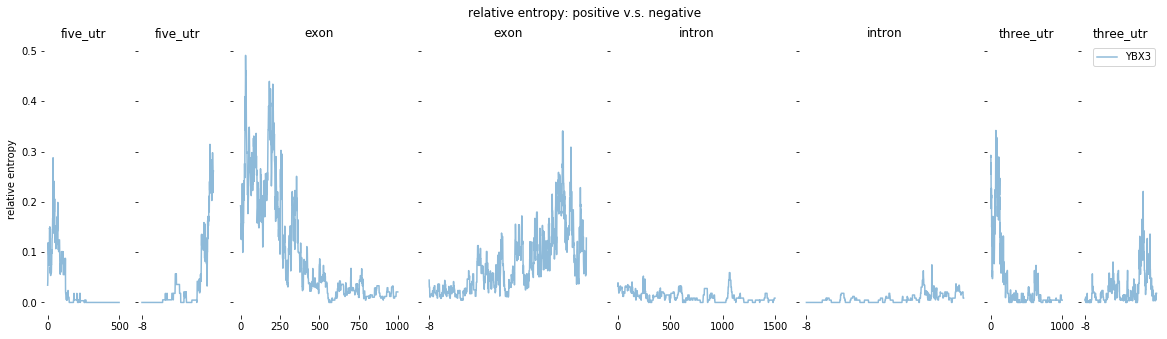

In [13]:
plot_entropy(entro, 'YBX3')

# Load density probability distribution

In [14]:
prob = dd.io.load(root_dir + '729_prob.h5')

In [15]:
prob.keys() 

dict_keys([('positive', 'five_utr', 'left', 'rep1'), ('positive', 'five_utr', 'left', 'rep2'), ('positive', 'five_utr', 'right', 'rep1'), ('positive', 'five_utr', 'right', 'rep2'), ('negative', 'five_utr', 'left', 'rep1'), ('negative', 'five_utr', 'left', 'rep2'), ('negative', 'five_utr', 'right', 'rep1'), ('negative', 'five_utr', 'right', 'rep2'), ('positive', 'exon', 'left', 'rep1'), ('positive', 'exon', 'left', 'rep2'), ('positive', 'exon', 'right', 'rep1'), ('positive', 'exon', 'right', 'rep2'), ('negative', 'exon', 'left', 'rep1'), ('negative', 'exon', 'left', 'rep2'), ('negative', 'exon', 'right', 'rep1'), ('negative', 'exon', 'right', 'rep2'), ('positive', 'intron', 'left', 'rep1'), ('positive', 'intron', 'left', 'rep2'), ('positive', 'intron', 'right', 'rep1'), ('positive', 'intron', 'right', 'rep2'), ('negative', 'intron', 'left', 'rep1'), ('negative', 'intron', 'left', 'rep2'), ('negative', 'intron', 'right', 'rep1'), ('negative', 'intron', 'right', 'rep2'), ('positive', 'thr

In [16]:
prob['positive', 'five_utr', 'left', 'rep1'].shape

(20, 500)

# Load density array 
same as `eCLIP.density_array()`

In [18]:
denarray = dd.io.load(root_dir + '729_densityarr.h5')

In [19]:
denarray.keys()

dict_keys([('positive', 'five_utr', 'left', 'rep1'), ('positive', 'five_utr', 'left', 'rep2'), ('positive', 'five_utr', 'right', 'rep1'), ('positive', 'five_utr', 'right', 'rep2'), ('negative', 'five_utr', 'left', 'rep1'), ('negative', 'five_utr', 'left', 'rep2'), ('negative', 'five_utr', 'right', 'rep1'), ('negative', 'five_utr', 'right', 'rep2'), ('positive', 'exon', 'left', 'rep1'), ('positive', 'exon', 'left', 'rep2'), ('positive', 'exon', 'right', 'rep1'), ('positive', 'exon', 'right', 'rep2'), ('negative', 'exon', 'left', 'rep1'), ('negative', 'exon', 'left', 'rep2'), ('negative', 'exon', 'right', 'rep1'), ('negative', 'exon', 'right', 'rep2'), ('positive', 'intron', 'left', 'rep1'), ('positive', 'intron', 'left', 'rep2'), ('positive', 'intron', 'right', 'rep1'), ('positive', 'intron', 'right', 'rep2'), ('negative', 'intron', 'left', 'rep1'), ('negative', 'intron', 'left', 'rep2'), ('negative', 'intron', 'right', 'rep1'), ('negative', 'intron', 'right', 'rep2'), ('positive', 'thr

In [25]:
denarray['positive', 'intron', 'left', 'rep1'].shape

(91, 1500)

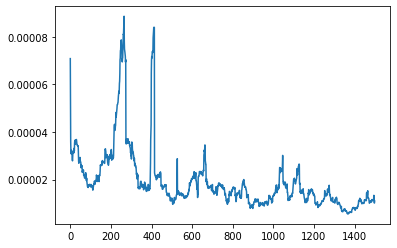

In [26]:
plt.plot(np.nanmean(denarray['positive', 'intron', 'left', 'rep1'],axis = 0))